In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.89 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
netflix_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


1. How has the distribution of content ratings changed over time?

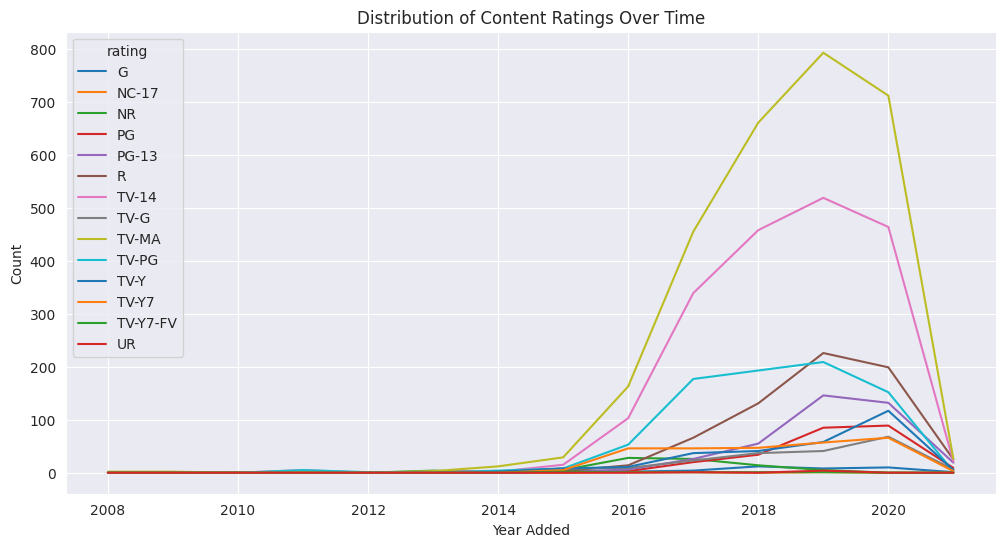

In [5]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)
netflix_df['year_added'] = netflix_df['date_added'].dt.year
rating_trend = netflix_df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

rating_trend.plot(kind='line', figsize=(12,6))
plt.title("Distribution of Content Ratings Over Time")
plt.ylabel("Count")
plt.xlabel("Year Added")
plt.show()


2. Is there a relationship between content age and its type (Movie vs. TV Show)?

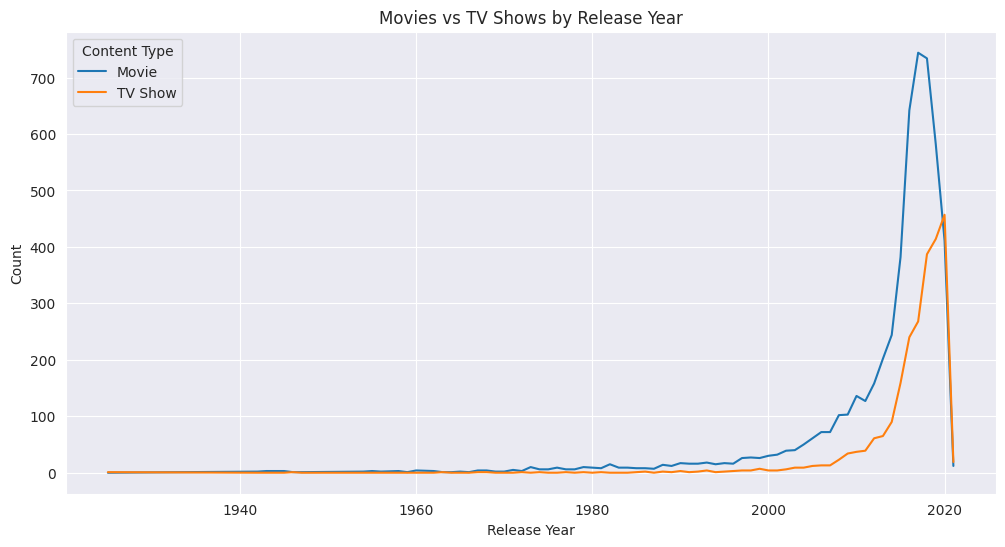

In [6]:
content_age = netflix_df[['type', 'release_year']].groupby(['type', 'release_year']).size().unstack(fill_value=0)

content_age.T.plot(kind='line', figsize=(12,6))
plt.title("Movies vs TV Shows by Release Year")
plt.ylabel("Count")
plt.xlabel("Release Year")
plt.legend(title='Content Type')
plt.show()

3. Trends in content production (Release year vs Year added to Netflix)

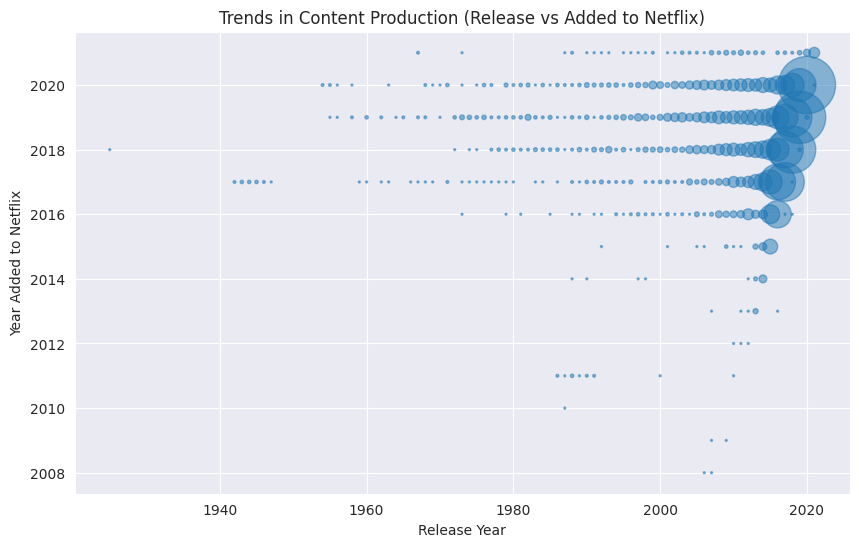

In [7]:
trend = netflix_df.groupby(['release_year', 'year_added']).size().reset_index(name="count")

plt.figure(figsize=(10,6))
plt.scatter(trend['release_year'], trend['year_added'], s=trend['count']*2, alpha=0.5)
plt.title("Trends in Content Production (Release vs Added to Netflix)")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.show()

4. Most common word pairs/phrases in descriptions

In [9]:
import nltk
from collections import Counter
from nltk.util import ngrams

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

descriptions = netflix_df['description'].dropna().str.lower()

tokens = [nltk.word_tokenize(desc) for desc in descriptions]

bigrams = []
for tok in tokens:
    bigrams.extend(list(ngrams(tok, 2)))

bigram_counts = Counter(bigrams).most_common(20)
print("Most common word pairs in descriptions:")
for pair, freq in bigram_counts:
    print(f"{pair}: {freq}")

Most common word pairs in descriptions:
(',', 'a'): 1425
('in', 'a'): 627
('in', 'this'): 613
('in', 'the'): 601
('of', 'the'): 573
('of', 'a'): 495
('with', 'a'): 410
('on', 'a'): 391
('a', 'young'): 369
('when', 'a'): 350
('to', 'the'): 337
('and', 'a'): 335
('’', 's'): 335
('for', 'a'): 330
('on', 'the'): 327
(',', 'the'): 325
('and', 'his'): 319
('and', 'the'): 280
('to', 'a'): 279
(',', 'but'): 267


5. Top directors on Netflix

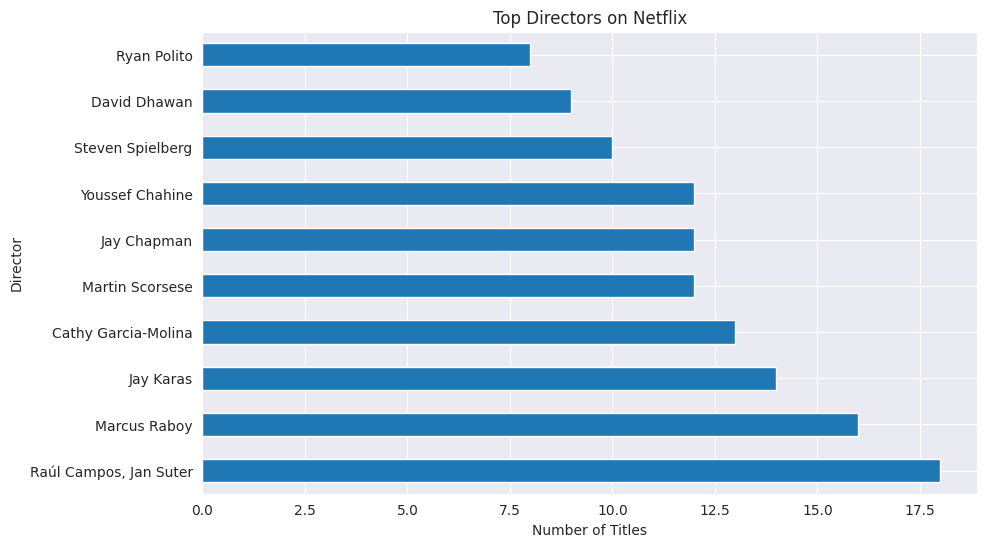

In [10]:
# Count directors
top_directors = netflix_df['director'].dropna().value_counts().head(10)

# Plot
top_directors.plot(kind='barh', figsize=(10,6))
plt.title("Top Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

In [11]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text = "This is a sample sentence. Another sentence follows."
tokens = word_tokenize(text)
print(tokens)

['This', 'is', 'a', 'sample', 'sentence', '.', 'Another', 'sentence', 'follows', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
